In [1]:
import pandas as pd
import numpy as np

In [2]:
import src

In [3]:
%pwd

'C:\\Users\\bjk1y13\\OneDrive - University of Southampton\\MH028_UHS_Weather\\4_Analysis\\EDclassification\\notebooks\\model'

In [6]:
def load_pickle_preprocessed_data(path):
    """
    Load pickled data for modelling.
    
    Input
    =====
    path, str, to fodler where data is located.
    
    Output
    ======
    X_train,dataframe, 
    X_test,dataframe, 
    y_train,dataframe, 
    y_test, dataframe, 
    
    """
    #### load each data file
    X_train = pd.read_pickle(path + 'X_train.pkl')
    X_test = pd.read_pickle(path + 'X_test.pkl')
    y_train = pd.read_pickle(path + 'y_train.pkl')
    y_test = pd.read_pickle(path + 'y_test.pkl')
    
    return(X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = load_pickle_preprocessed_data('../../data/processed/v1/')

In [7]:
X_train.shape

(1654, 52)

In [8]:
X_train.head(1)

,EDoccMAX_prevday,callender_DAY(first_EDatt_time),EDmorn_COUNT(EDatt),EDmorn_MEAN(EDatt.wait_time_total),EDmorn_MEAN(EDatt.flag_specreq),EDmorn_MEAN(EDatt.age),EDmorn_MEAN(EDatt.flag_admission),EDmorn_STD(EDatt.wait_time_total),EDmorn_STD(EDatt.flag_specreq),EDmorn_STD(EDatt.age),...,callender_MONTH(first_EDatt_time)_4,callender_MONTH(first_EDatt_time)_5,callender_MONTH(first_EDatt_time)_6,callender_MONTH(first_EDatt_time)_7,callender_MONTH(first_EDatt_time)_8,callender_MONTH(first_EDatt_time)_9,callender_MONTH(first_EDatt_time)_10,callender_MONTH(first_EDatt_time)_11,callender_MONTH(first_EDatt_time)_12,callender_WEEKEND(first_EDatt_time)
0,-0.452744,-1.552923,-1.520733,-2.575791,0.77684,0.788307,-1.017596,-1.371472,-0.44764,0.724071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Instantiate model

# Run CV gridsearch

In [9]:
from sklearn.metrics import classification_report,precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.model_selection import TimeSeriesSplit

from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV



def find_best_model(model, grid, Xdata, ydata, plot_label):
    """does gridsearch for model and plots result from """
    my_cv = TimeSeriesSplit(n_splits=5).split(Xdata) # 5 chosen as gives roughly 1 year groups for each fold
    grid_search = GridSearchCV(model,grid,scoring='f1',cv=my_cv,return_train_score=True)
    grid_search.fit(Xdata,ydata)
    model = grid_search.best_estimator_
    print('CV MODEL RESULTS')
    print(grid_search.best_params_)
    print(pd.DataFrame(grid_search.cv_results_).query('rank_test_score == 1')[['mean_test_score','mean_train_score']])
    
#     plot_model_perf(ydata,Xdata,model,plot_label)

    
    return(grid_search)
    

In [10]:
X_train.shape[0]/5

330.8

In [11]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver='liblinear',class_weight ='balanced')

grid = {'C':[0.05, 0.1,0.2,0.3,0.5,0.7,1,3,10]}
#grid = {'C':[0.1]}

grid_search = find_best_model(lgr,grid,X_train,y_train,'CV set')
lgr = grid_search.best_estimator_

# grid_search.fit(X_trainT,y_train)
# plot_model_perf(y_test,X_testT,grid_search.best_estimator_,'Test')

CV MODEL RESULTS
{'C': 0.3}
   mean_test_score  mean_train_score
3         0.513112          0.641505


In [12]:
pd.DataFrame(grid_search.cv_results_).T

,0,1,2,3,4,5,6,7,8
mean_fit_time,0.00978246,0.00799403,0.00838556,0.00976262,0.00997205,0.0103794,0.0139628,0.0147679,0.0183421
std_fit_time,0.00272905,0.00324271,0.00311834,0.00426086,0.0029742,0.00343772,0.00591555,0.00687004,0.00993164
mean_score_time,0.00318837,0.00198808,0.0019896,0.00200272,0.00180383,0.00178785,0.00217786,0.00220375,0.00159669
std_score_time,0.00193552,2.89313e-05,2.18743e-05,0.000891947,0.000403321,0.000395563,0.00117419,0.000756219,0.000489493
param_C,0.05,0.1,0.2,0.3,0.5,0.7,1,3,10
params,{'C': 0.05},{'C': 0.1},{'C': 0.2},{'C': 0.3},{'C': 0.5},{'C': 0.7},{'C': 1},{'C': 3},{'C': 10}
split0_test_score,0.391892,0.408163,0.408163,0.394558,0.386207,0.383562,0.378378,0.380952,0.383562
split1_test_score,0.493976,0.503067,0.5,0.496644,0.478873,0.444444,0.415385,0.413793,0.381818
split2_test_score,0.548673,0.576923,0.623656,0.644444,0.626506,0.592593,0.6,0.586667,0.583333
split3_test_score,0.5,0.52381,0.533333,0.529915,0.530973,0.550459,0.560748,0.582524,0.571429


In [13]:
from src.eval.eval_utils import BinClassEval

# Warning not sure hsould be evaluating like this! should be using cv_prediction!

No handles with labels found to put in legend.


Model has decision_function.
Model has predict_proba.
AUC:  0.911
F1 score:  0.577
accuracy:  0.813


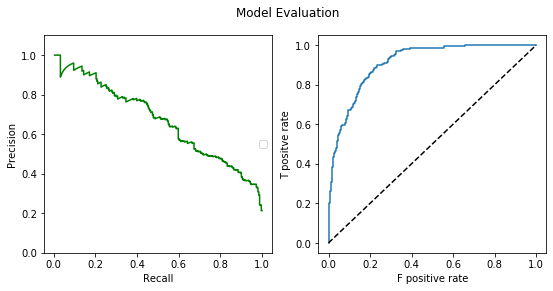

In [14]:
BinClassEval(lgr, X_train, y_train, plot=True)

In [13]:
from sklearn.feature_selection import SelectKBest

In [14]:
X = SelectKBest(k=40).fit_transform(X_train, y_train)

In [15]:
grid_search = find_best_model(lgr,grid,X,y_train,'CV set')
lgr_kbest = grid_search.best_estimator_

CV MODEL RESULTS
{'C': 0.5}
   mean_test_score  mean_train_score
4         0.519775          0.628764


No handles with labels found to put in legend.


Model has decision_function.
Model has predict_proba.
AUC:  0.909
F1 score:  0.573
accuracy:  0.81


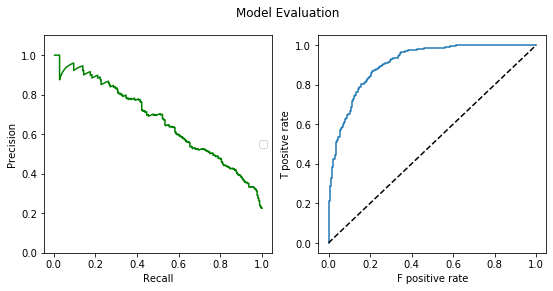

In [16]:
BinClassEval(lgr_kbest, X, y_train, plot=True)

# Logging model and trianing results

Create first log df

In [17]:
model_log = pd.DataFrame(columns=['dataV','model','gridsearch','mean_train','mean_valid','notes'])

In [18]:
model_log

,dataV,model,gridsearch,mean_train,mean_valid,notes


In [19]:
model_log.to_pickle('./../data/output/model_log.pkl')

In [21]:
from src.eval.eval_utils import save_model_to_log

In [22]:
save_model_to_log('./../data/output/model_log.pkl', 'v1', lgr, grid_search, 'Initial model which was built on first edition of data as basline.')

Model logged.


In [23]:
pd.read_pickle('./../data/output/model_log.pkl')

,dataV,model,gridsearch,mean_train,mean_valid,notes
0,v1,"LogisticRegression(C=0.3, class_weight='balanc...",mean_fit_time std_fit_time mean_score_tim...,[0.629],[0.52],Initial model which was built on first edition...
